In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

['calibration1.jpg', 'calibration10.jpg', 'calibration11.jpg', 'calibration12.jpg', 'calibration13.jpg', 'calibration14.jpg', 'calibration15.jpg', 'calibration16.jpg', 'calibration17.jpg', 'calibration18.jpg', 'calibration19.jpg', 'calibration2.jpg', 'calibration20.jpg', 'calibration3.jpg', 'calibration4.jpg', 'calibration5.jpg', 'calibration6.jpg', 'calibration7.jpg', 'calibration8.jpg', 'calibration9.jpg']
(1280, 720)


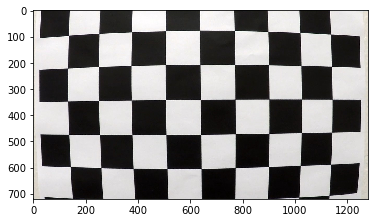

In [3]:
all_img = glob.glob('calibration*.jpg')
print(all_img)
img = mpimg.imread(all_img[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
img_size = gray.shape[::-1]
print(img_size)
plt.imshow(img)

In [4]:
objpoints = []
imgpoints = []
processed_images = []
objp_9x6 = np.zeros([6*9,3], np.float32)
objp_9x6[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objp_9x5 = np.zeros([5*9,3], np.float32)
objp_9x5[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)

In [5]:
for img_name in all_img:
    img = mpimg.imread(img_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    # plt.imshow(gray, cmap='gray')
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp_9x6)
        processed_images.append(img)
    else:
        ret, corners = cv2.findChessboardCorners(gray, (9,5), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp_9x5)
            processed_images.append(img)
    print(img_name, img.shape, ret)
    
print("Added points from " + str(len(imgpoints)) + " images")  

calibration1.jpg (720, 1280, 3) True
calibration10.jpg (720, 1280, 3) True
calibration11.jpg (720, 1280, 3) True
calibration12.jpg (720, 1280, 3) True
calibration13.jpg (720, 1280, 3) True
calibration14.jpg (720, 1280, 3) True
calibration15.jpg (721, 1281, 3) True
calibration16.jpg (720, 1280, 3) True
calibration17.jpg (720, 1280, 3) True
calibration18.jpg (720, 1280, 3) True
calibration19.jpg (720, 1280, 3) True
calibration2.jpg (720, 1280, 3) True
calibration20.jpg (720, 1280, 3) True
calibration3.jpg (720, 1280, 3) True
calibration4.jpg (720, 1280, 3) False
calibration5.jpg (720, 1280, 3) False
calibration6.jpg (720, 1280, 3) True
calibration7.jpg (721, 1281, 3) True
calibration8.jpg (720, 1280, 3) True
calibration9.jpg (720, 1280, 3) True
Added points from 18 images


In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(ret, mtx, dist)

0.9219824648247726 [[  1.15868736e+03   0.00000000e+00   6.67544834e+02]
 [  0.00000000e+00   1.15554015e+03   3.90472669e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]] [[ -2.38572682e-01  -5.85915366e-02  -7.59157372e-04   1.09441573e-04
    5.65412409e-02]]


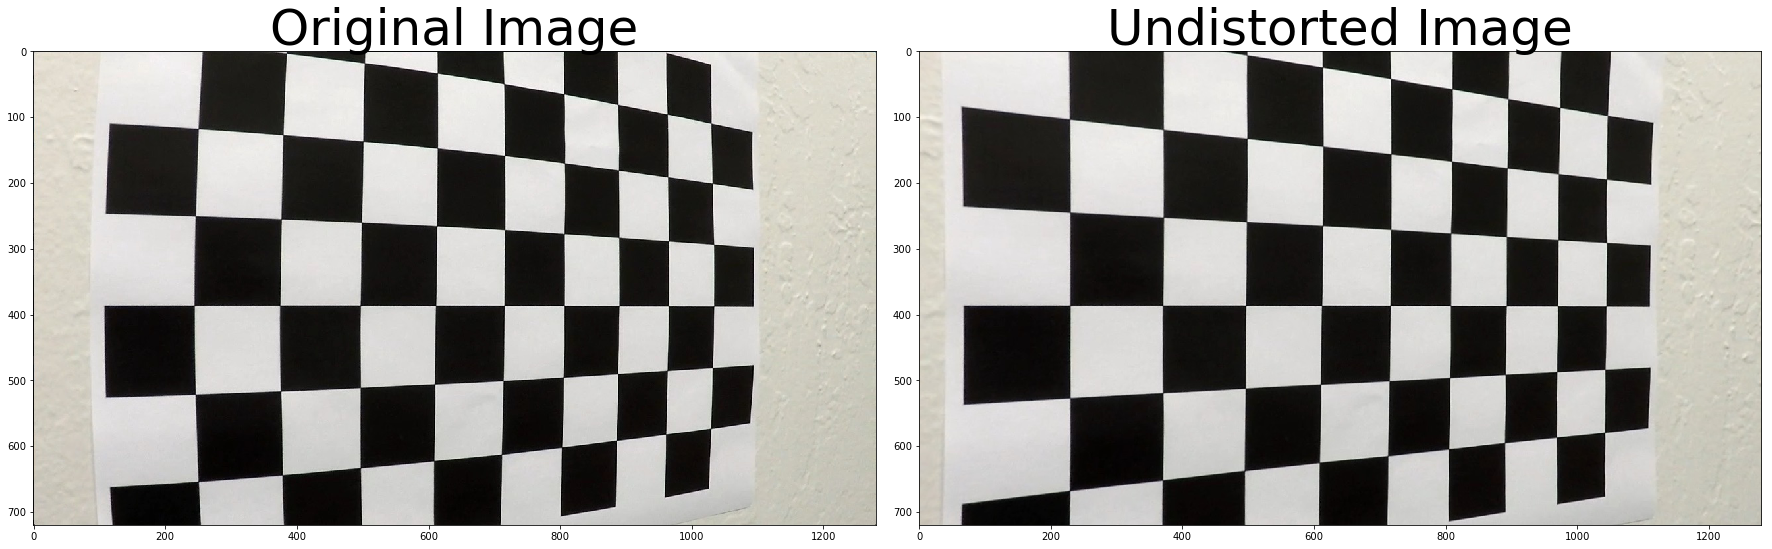

In [13]:
img = mpimg.imread("calibration5.jpg")
undist = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)